<a href="https://colab.research.google.com/github/raimukul/malicious_url_detection_using_ml/blob/main/A_COMPARATIVE_STUDY_OF_MUD_USING_ML_TECHNIQUES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Step 1 : Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

##**Step 2 : Loading data into dataframe**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/raimukul/malicious_url_detection_using_ml/main/phishing.csv")
data.head() 

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## **Step 3: Exploratory Data Analysis**


---


It refers to the critical process of **performing initial investigations** on data so as to **discover patterns,to spot anomalies,to test hypothesis and to check assumptions** with the help of summary statistics and graphical representations.

```
 3.1.   Shape of dataframe
 3.2.   Listing the features of the dataset
 3.3.   Information about the dataset
 3.4.   Non-unique value in columns
 3.5.   Droping index column
 3.6.   Description of dataset
```
**Observation from Exploratory Data Analysis**


```
1. The collection contains 11054 instances and 31 fearures.
2. Thirty of the features are independent, while one is dependent.
3. Because each feature has an int datatype, LabelEncoder is not required.
4. The dataset has no outliers.
5. The dataset has no missing values.
```









In [3]:
# 3.1. Shape of dataframe

data.shape

(11054, 32)

In [4]:
# 3.2. Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [5]:
# 3.3. Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [6]:
# 3.4. Non-unique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [7]:
#3.5. Droping index column

data = data.drop(['Index'],axis = 1)

In [8]:
#3.6. Description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


## **Step 4: Visualization of Data**
The graphical depiction of information and data in a pictorial or graphical manner is known as data visualisation (Example: charts, graphs, and maps). Data visualisation tools make it easy to observe and comprehend trends, patterns, and outliers in data. When it comes to evaluating large volumes of data and making data-driven choices, data visualisation tools and technologies are critical. Using visuals to interpret data that has been utilised for millennia is an idea that has been around for generations. Charts, tables, graphs, maps, and dashboards are all examples of data visualisation.
1. **Correlation Heatmap of all features**\
A correlation heatmap is a graphical depiction of a correlation matrix that shows how different variables are related. Correlation can have a value ranging from -1 to 1. A causal link between two random variables or bivariate data is not always implied by correlation.
2. **Pairplot for particular features**\
In a dataset, a pairplot plots pairwise relationships. The pairplot function generates a grid of Axes in which each variable in the data is spread over a single row and a single column on the y-axis.
3. **Phishing Count in pie chart**\
Phishing attacks occur when a person sends a fake message that appears to come from a trusted source. Email is the most used method of communication.


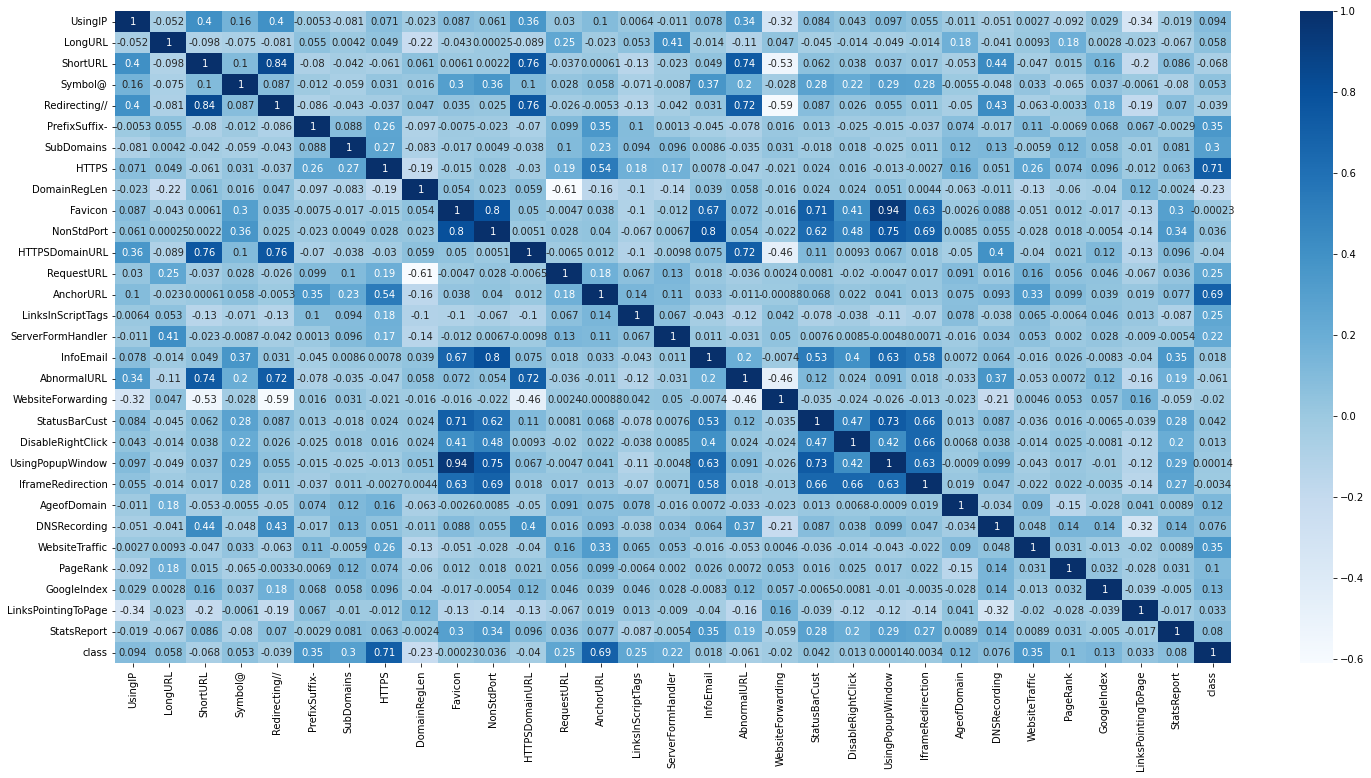

In [9]:
# 4.1. Correlation Heatmap of all features

plt.figure(figsize=(25,12))
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.show()

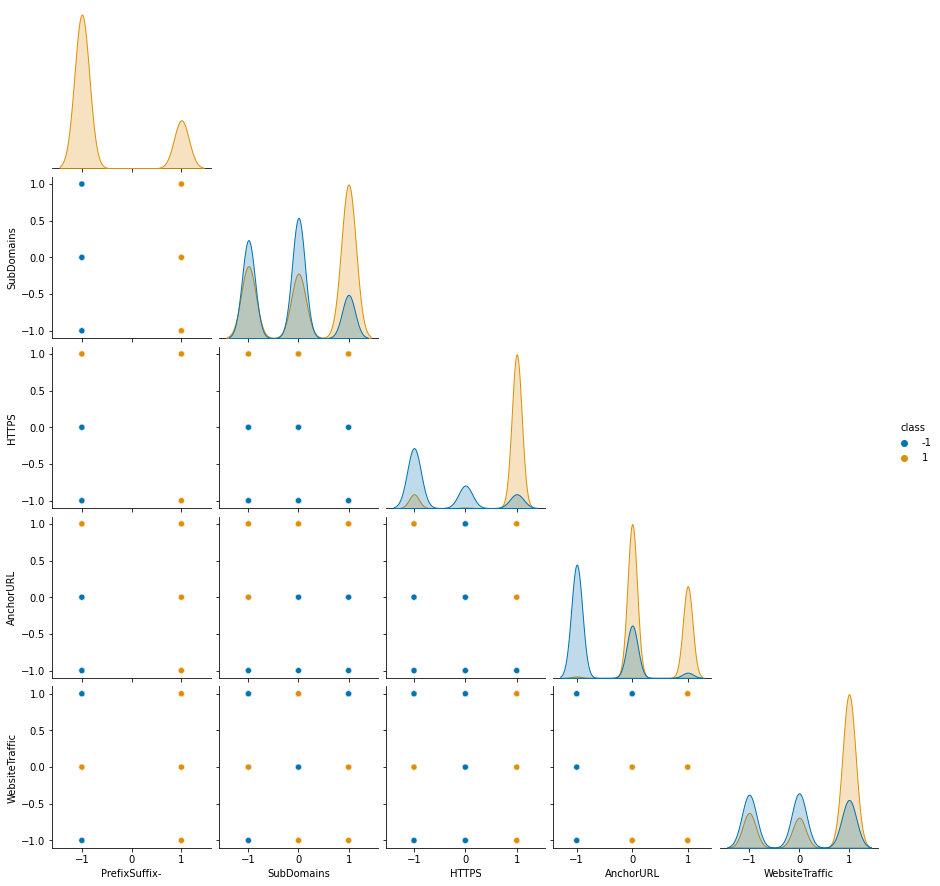

In [10]:
# 4.2. Pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True, palette='colorblind');

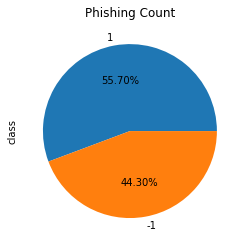

In [11]:
# 3.3. Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## **Step 5: Splitting the Data**
To assess how effectively our machine learning model works, we must divide a dataset into train and test sets. The train set is used to fit the model, and the train set's data are available. The test data set is the second collection, and it is only utilised to make predictions.\
**Scikit-learn**, sometimes known as **sklearn**, is Python's most useful and robust machine learning toolkit. The splitter function `train_test_split()` is available in the model selection module of the scikit-learn package ().

**5.1.**  Separating the dataset into independent and dependent fetature\
**5.2.** Creating train and test sets from the dataset: The ratio is 80-20.

In [12]:
# 5.1. Separating the dataset into independent and dependent fetature
X = data.drop(["class"],axis =1)
y = data["class"]

In [13]:
# 5.2. Creating train and test sets from the dataset: The ratio is 80-20.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## **Step 6: Model Development and Training**
One of the most widely used and successful forms of machine learning is **supervised machine learning.** When we wish to predict an outcome/label from a collection of features, we utilise supervised learning, and we have instances of features-label pairings. From our training set of features-label pairings, we create a machine learning model. Our objective is to produce accurate forecasts for previously unseen data. Classification and regression are the two primary categories of supervised machine learning issues. Because the forecast of suicide rate is a continuous number, or a floating-point number in programming words, our data set is a regression issue. The following supervised machine learning models (regression) were used to train the dataset:\
**1.	Multilayer Perceptrons**\
**2.	Logistic Regression**\
**3.	Support Vector Classifier**\
**4.	Naive Bayes**\
**5.	Decision Tree**\
**6.	Gradient Boosting**\
**7.	Catboost**\
**8.	Random Forest**\
**9.	k-Nearest Neighbors**\
**10.	Xgboost**


**Steps for Model Development and training**\
**Step 5.1** *Making holders to keep the model's performance data*\
**Step 5.2** *Implementing Logistic Regression*


## **Step 6.1: Making holders to keep the model's performance data**

Firstly we design a holder that store data such as 
1. Model Name
2. Accuracy 
3. F1 Score
4. Recall
5. Precision

In [14]:
# Step 5.1: Making holders to keep the model's performance data

ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## **Step 6.2: Implementing Logistic Regression**
1. A categorical dependent variable's output is predicted using logistic regression. As a result, the result must be a discrete or categorical value. It can be Yes or No, 0 or 1, true or false, and so on, but instead of giving precise values like 0 and 1, it delivers probabilistic values that are somewhere between 0 and 1.
2. For regression problems, Linear Regression is employed, whereas for classification difficulties, Logistic Regression is used.


In [15]:
#implementation of Linear regression model 

from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [16]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [17]:
#Computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("precision on training Data: {:.3f}".format(precision_score_train_log))
print("precision on test Data: {:.3f}".format(precision_score_test_log))

Accuracy on training Data: 0.927
Accuracy on test Data: 0.934

f1_score on training Data: 0.935
f1_score on test Data: 0.941

Recall on training Data: 0.943
Recall on test Data: 0.953

precision on training Data: 0.927
precision on test Data: 0.930


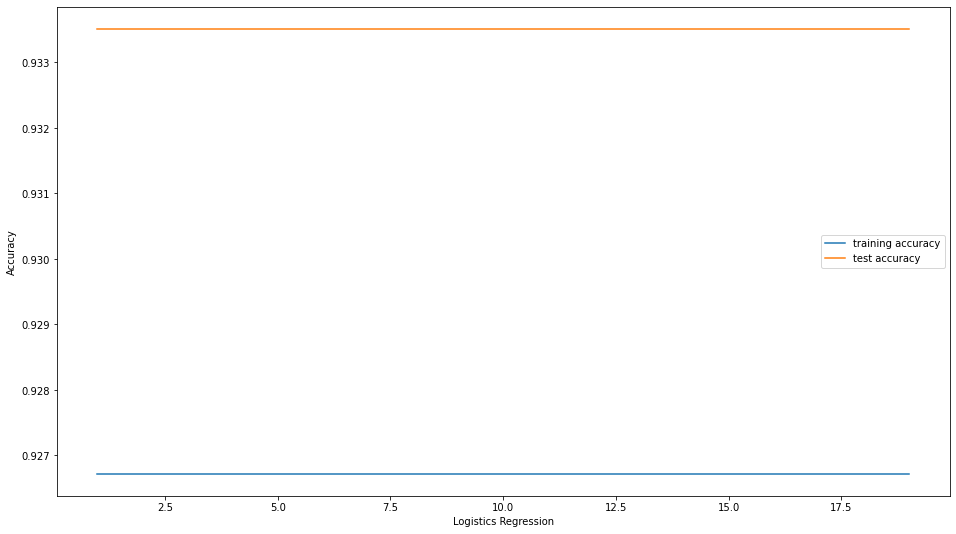

In [18]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    lr = LogisticRegression()

    lr.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(lr.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(lr.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=(16.0, 9.0))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Logistics Regression")
plt.legend();

In [19]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [20]:
#storing the results

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## **Step 6.3: Implementing Support Vector Machine**
The Support Vector Machine, or SVM, is a common Supervised Learning technique that may be used to solve both classification and regression issues. However, it is mostly utilised in Machine Learning for Classification difficulties.

The SVM algorithm's purpose is to find the optimum line or decision boundary for categorising n-dimensional space into classes so that additional data points may be readily placed in the proper category in the future. A hyperplane is the name for the optimal choice boundary.

The extreme points/vectors that assist create the hyperplane are chosen via SVM. Support vectors are the extreme instances, and the method is called a Support Vector Machine.

In [21]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [22]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [23]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("precision on training Data: {:.3f}".format(precision_score_train_svc))
print("precision on test Data: {:.3f}".format(precision_score_test_svc))

Accuracy on training Data: 0.969
Accuracy on test Data: 0.964

f1_score on training Data: 0.973
f1_score on test Data: 0.968

Recall on training Data: 0.980
Recall on test Data: 0.980

precision on training Data: 0.965
precision on test Data: 0.957


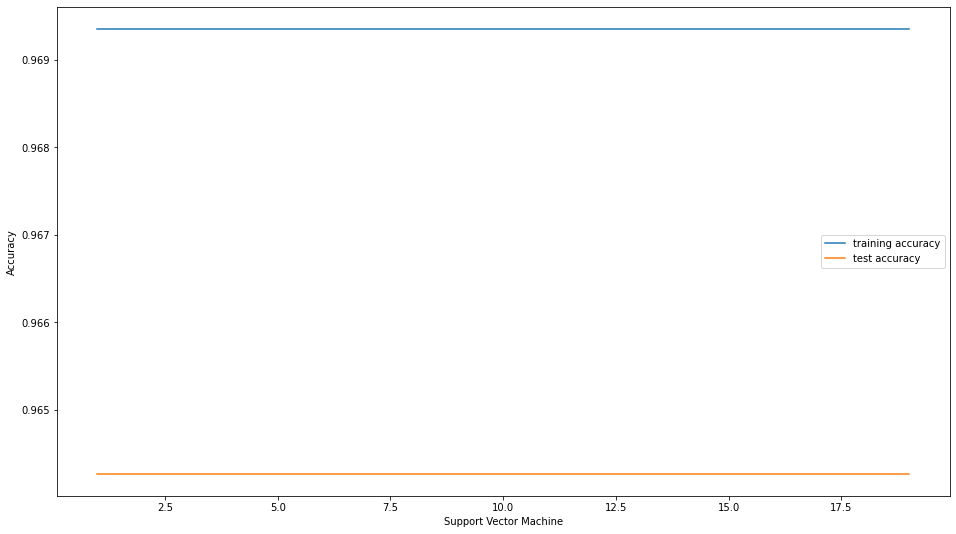

In [24]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    svc = GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

    svc.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(svc.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(svc.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=(16.0, 9.0))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Support Vector Machine")
plt.legend();

In [25]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [26]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## **6.4: Implementing  Naive Bayes Classifier**
The Bayes' Theorem is used to create a set of classification algorithms known as Naive Bayes classifiers. It is a family of algorithms that share a similar idea, namely that each pair of characteristics being categorised is independent of the others.


In [27]:
# implementation of Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [28]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [29]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("precision on training Data: {:.3f}".format(precision_score_train_nb))
print("precision on test Data: {:.3f}".format(precision_score_test_nb))

Accuracy on training Data: 0.605
Accuracy on test Data: 0.605

f1_score on training Data: 0.451
f1_score on test Data: 0.454

Recall on training Data: 0.292
Recall on test Data: 0.294

precision on training Data: 0.997
precision on test Data: 0.995


In [30]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



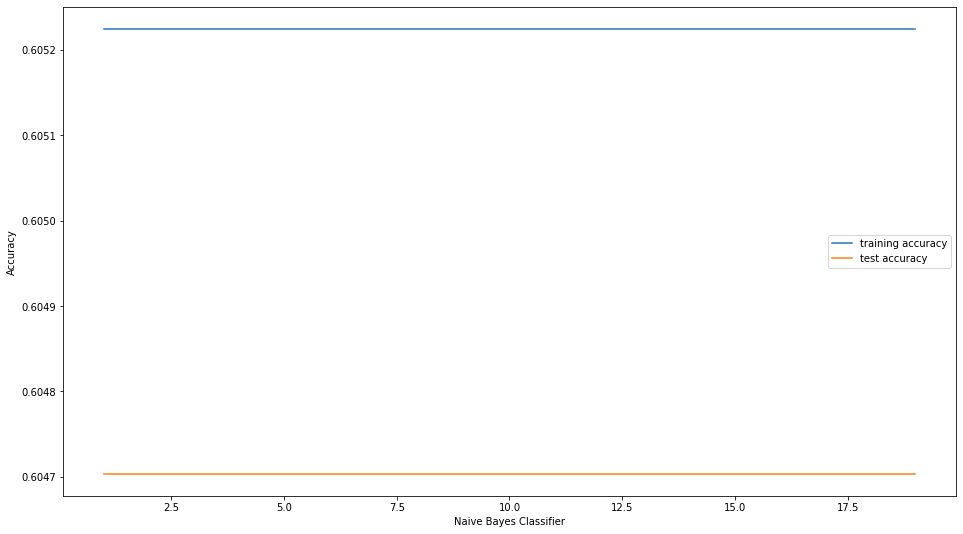

In [31]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    gnb = GaussianNB()

    gnb.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(gnb.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(gnb.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=(16.0, 9.0))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("Naive Bayes Classifier")
plt.legend();

In [32]:
storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

### **6.5: Implementing Decision Trees Classifier**
Decision Tree is a supervised learning approach that may be used to solve both classification and regression problems, however it is most commonly employed to solve classification issues. Internal nodes contain dataset attributes, branches reflect decision rules, and each leaf node provides the conclusion in this tree-structured classifier.

In [33]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [34]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [35]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("precision on training Data: {:.3f}".format(precision_score_train_tree))
print("precision on test Data: {:.3f}".format(precision_score_test_tree))

Accuracy on training Data: 0.991
Accuracy on test Data: 0.957

f1_score on training Data: 0.992
f1_score on test Data: 0.961

Recall on training Data: 0.991
Recall on test Data: 0.960

precision on training Data: 0.993
precision on test Data: 0.963


In [36]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



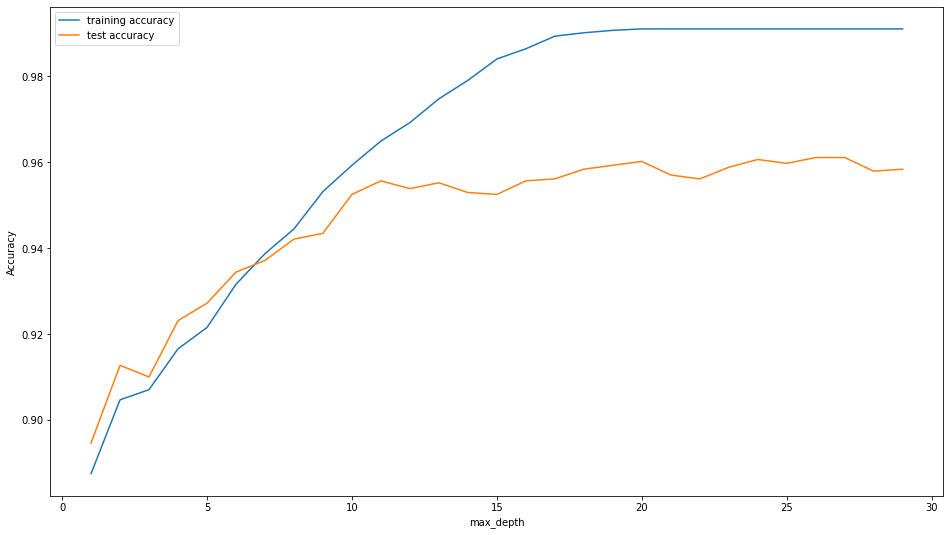

In [37]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.figure(figsize=(16.0, 9.0))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [38]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## **6.5: Implementing Random Forest Classifier**
"A Random Forest is a classifier that combines a number of decision trees on different subsets of a dataset and averages them to increase the dataset's predicted accuracy."\
Instead than depending on a single decision tree, the random forest collects the forecasts from each tree and predicts the final output based on the majority votes of predictions.\
The bigger the number of trees in the forest, the more accurate it is and the problem of overfitting is avoided.

In [39]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [40]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [41]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("precision on training Data: {:.3f}".format(precision_score_train_forest))
print("precision on test Data: {:.3f}".format(precision_score_test_forest))

Accuracy on training Data: 0.990
Accuracy on test Data: 0.970

f1_score on training Data: 0.991
f1_score on test Data: 0.973

Recall on training Data: 0.992
Recall on test Data: 0.975

precision on training Data: 0.990
precision on test Data: 0.963


In [42]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.97       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



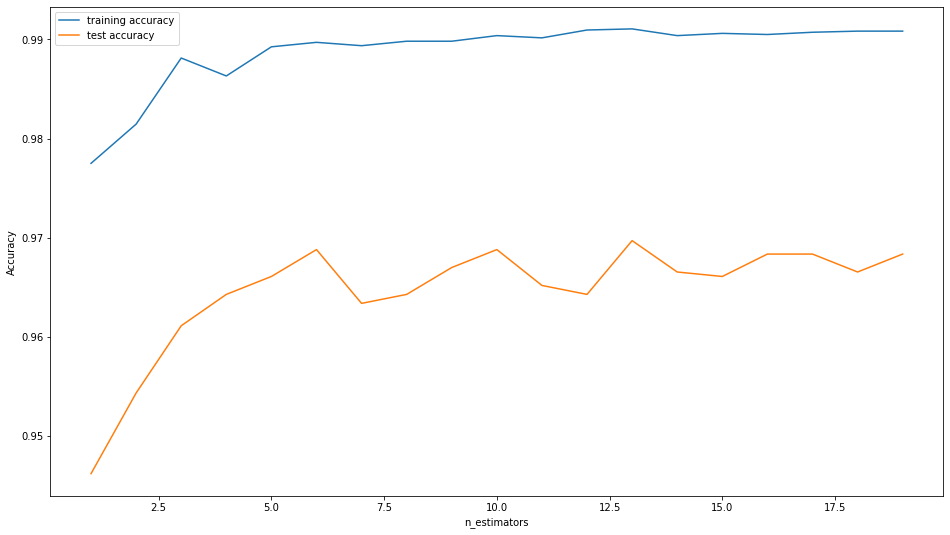

In [43]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=(16.0, 9.0))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [44]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## **6.6: Implementing Gradient Boosting Classifier**
Gradient boosting classifiers are a collection of machine learning algorithms that combine many weak learning models to generate a powerful prediction model. When conducting gradient boosting, decision trees are commonly employed.

 Gradient boosting models are gaining popularity as a result of their ability to categorise difficult datasets, and they have lately won a number of Kaggle data science challenges.

In [45]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [46]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [47]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("precision on test Data: {:.3f}".format(precision_score_test_gbc))

Accuracy on training Data: 0.989
Accuracy on test Data: 0.974

f1_score on training Data: 0.990
f1_score on test Data: 0.977

Recall on training Data: 0.994
Recall on test Data: 0.989

precision on training Data: 0.986
precision on test Data: 0.966


In [48]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



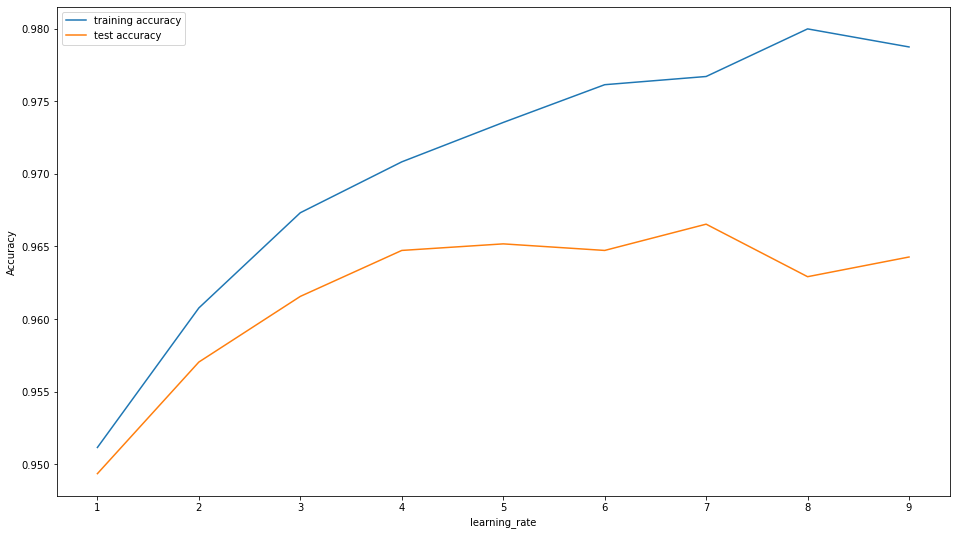

In [49]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=(16.0, 9.0))
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();